In [10]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
import scipy
import scipy.io as sio
import scipy.io.wavfile
import copy
import warnings
warnings.filterwarnings("ignore")

In [7]:
# load in birdcall
fs,bc = scipy.io.wavfile.read('XC403881.wav')

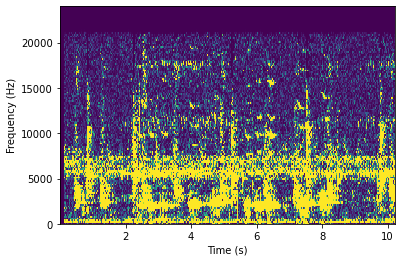

In [11]:
# time-frequency analysis via spectrogram 
frex,time,pwr = scipy.signal.spectrogram(bc[:,0],fs)
plt.pcolormesh(time,frex,pwr,vmin=0,vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()

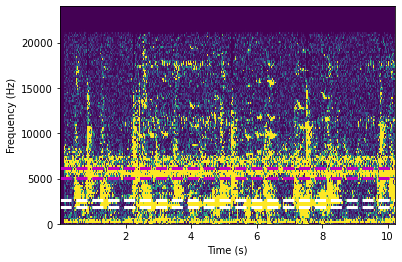

In [17]:
#Drawing boundary for differentiating high frequency with lower frequencies
frex,time,pwr = scipy.signal.spectrogram(bc[:,0],fs)
plt.pcolormesh(time,frex,pwr,vmin=0,vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')


# frequency ranges
frange = [ [1900, 2600], [5100, 6200] ] #Ranges where high spectral density can be observed.

# draw boundary lines on the plot
colorz = 'wm';
for fi in range(0,len(frange)):
    plt.plot([time[0],time[-1]],[frange[fi][0],frange[fi][0]],colorz[fi]+'--',linewidth=3)
    plt.plot([time[0],time[-1]],[frange[fi][1],frange[fi][1]],colorz[fi]+'--',linewidth=3)

plt.show()


In [22]:
## compute and applying FIR filters

# initialize output matrix
filteredSig = np.zeros((2,2,len(bc)))

# loop over filters
for i in range(len(frange)):
    
    # designing filter kernel
    order    = round( 10*(fs/frange[i][0]) )
    order    += ~order%2   #to make sure order is even 
    filtkern = signal.firwin(order,frange[i],fs=fs,pass_zero=False) 
    
    # loop over channels
    for channel in range(2):
        
        # get data from this channel
        dat1chan = bc[:,channel]
        
        # zero-phase-shift filter
        fsig = signal.filtfilt(filtkern,1,dat1chan)
        # enter into the matrix
        filteredSig[i,channel,:] = fsig


In [26]:
## playing sounds 

from IPython.display import Audio

# # original
# Audio(np.array(bc[:,0]), rate=fs)

# # lower frequency range
# Audio(np.array(filteredSig[0,0,:]), rate=fs)

# higher frequency range
Audio(np.array(filteredSig[1,0,:]), rate=fs)